In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_arch
import ruptures as rpt


In [4]:
df = pd.read_excel('data/serie_cafe_cepea_mensal.xlsx')

In [5]:
# tratamendo de nomeclatura das colunas

df.rename(columns = {
    'Data': 'date',
    'À vista R$': 'price_brl',
    'À vista US$': 'price_usd'
}, inplace = True)

In [6]:
df.tail()

,date,price_brl,price_usd
347,2025-08-01,2008.12,368.86
348,2025-09-01,2237.80,416.87
349,2025-10-01,2234.00,414.68
350,2025-11-01,2245.16,420.57
351,2025-12-01,2212.01,407.13


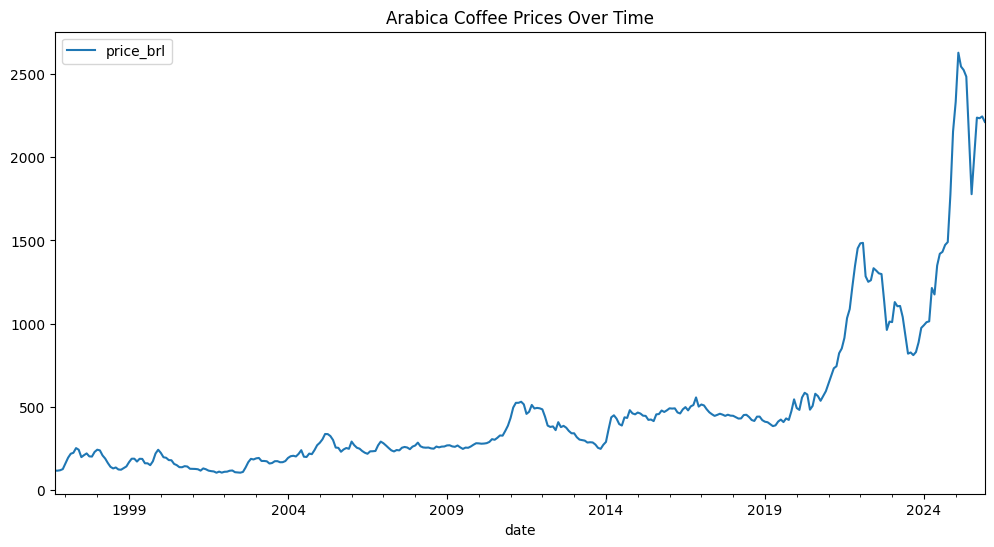

In [8]:
ax = df.plot(x='date', y='price_brl', figsize=(12, 6), title='Arabica Coffee Prices Over Time')

Série não estacionária

Tendência a longo prazo

volatilidade não constante

possível regime de swithing

choques exógenos (clima, câmbio, geopolítica, oferta global)

modelos lineares clássicos isolados talvez não funcione bem

propriedades estatísticas e estruturais da série do preço do café arábica e quais implicações essas propriedades têm para a escolha do modelo preditivo

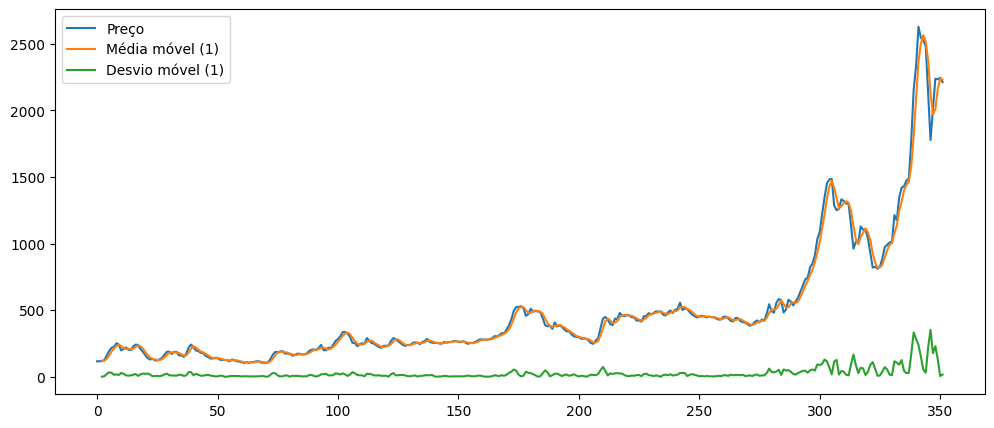

In [12]:
rolling_mean = df["price_brl"].rolling(3).mean()
rolling_std = df["price_brl"].rolling(3).std()

plt.figure(figsize=(12,5))
plt.plot(df["price_brl"], label="Preço")
plt.plot(rolling_mean, label="Média móvel (1)")
plt.plot(rolling_std, label="Desvio móvel (1)")
plt.legend()
plt.show()

não usar modelos que assumem variância constante

não usar modelos estacionários em nível

melhores práticas:

transformação log

modelos não lineares

modelos com adaptação temporal

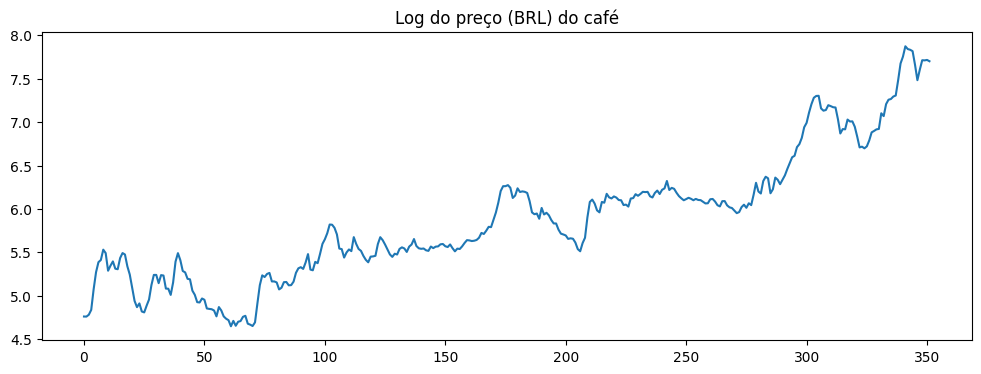

In [13]:
df["log_price_brl"] = np.log(df["price_brl"])
df["log_price_brl"].plot(figsize=(12,4))
plt.title("Log do preço (BRL) do café")
plt.show()


Devido à natureza multiplicativa da evolução dos preços do café, bem como à presença de heterocedasticidade crescente ao longo do tempo, os preços foram transformados por meio da função logarítmica natural. Essa transformação permite interpretar as variações como mudanças relativas, além de estabilizar a variância, atendendo melhor às suposições dos modelos de séries temporais utilizados.

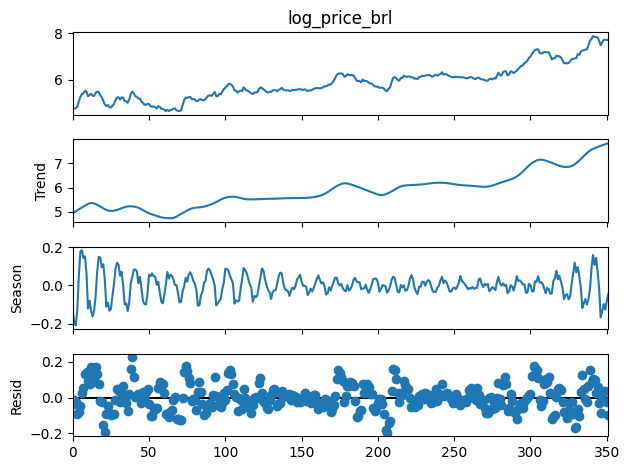

In [14]:
stl = STL(df["log_price_brl"], period=12)
result = stl.fit()

result.plot()
plt.show()

In [15]:
adf = adfuller(df["log_price_brl"].dropna())
kpss_test = kpss(df["log_price_brl"].dropna(), regression='c')

print("ADF p-value:", adf[1])
print("KPSS p-value:", kpss_test[1])

ADF p-value: 0.8681031971969208
KPSS p-value: 0.01


C:\Users\xd-bo\AppData\Local\Temp\ipykernel_23608\3823502747.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df["log_price_brl"].dropna(), regression='c')


Sério não estacionária

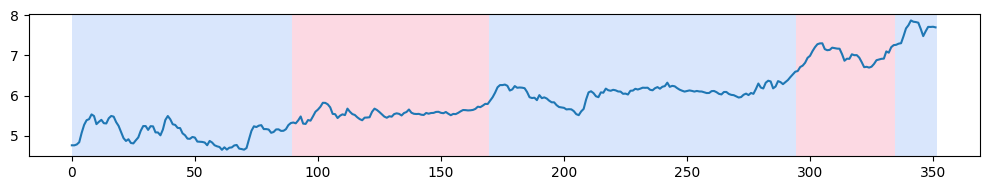

In [16]:
signal = df["log_price_brl"].dropna().values

algo = rpt.Pelt(model="rbf").fit(signal)
breaks = algo.predict(pen=10)

rpt.display(signal, breaks)
plt.show()

In [17]:
returns = df["log_price_brl"].diff().dropna()

arch_test = het_arch(returns)
print("ARCH p-value:", arch_test[1])


ARCH p-value: 0.000521928116342097


A série mensal do preço do café arábica do CEPEA apresenta não estacionariedade, tendência dominante, sazonalidade anual bem definida, heterocedasticidade condicional e mudanças estruturais ao longo do tempo, especialmente após 2020.